# 1. Load dataset

#### In this assignment, you will use a turbo.az dataset which is a collection of cars (Mercedes C-class). It contains information about 1328 cars with features of (Sheher, Marka, Model, Buraxilish ili, Ban novu, Reng, Muherrikin hecmi, Muherrikin gucu, Yanacaq novu, Yurush, Suretler qutusu, Oturucu, Yeni, Qiymet, Extra Information, Seller’s comment). You will need to read the data from data file (turboaz.csv) and extract only 3 columns for your model:
X1 - Yurush (mileage)<br>
X2 - Buraxilish ili (model year)<br>
Y - Qiymet (price)

In [1]:
import pandas as pd
my_columns = ['Yurush','Buraxilish ili','Qiymet']
df = pd.read_csv('turboaz.csv', usecols = my_columns)

mileage = df['Yurush'].apply(lambda x: float(x.rstrip('km').replace(' ', '')))

price = df['Qiymet'].apply(lambda x:\
                           float(x.rstrip('$').replace(' ',''))*1.7\
                           if '$' in x\
                           else float(x.rstrip('AZN').replace(' ', '')))

years = df['Buraxilish ili'].apply(lambda x: float(x))

df2 = pd.concat([mileage, years, price], axis = 1)

print("original data")
print(df2)
print("\ndata after cleaning")
print(df2.describe())

original data
        Yurush  Buraxilish ili   Qiymet
0     366000.0          1999.0  12500.0
1     102000.0          2014.0  53550.0
2     469700.0          2002.0  11700.0
3     556680.0          1998.0   9700.0
4     300000.0          2000.0  12700.0
...        ...             ...      ...
1323  325000.0          1996.0   8800.0
1324  280000.0          1994.0   6300.0
1325  272000.0          1998.0  10900.0
1326  207000.0          2000.0  11300.0
1327  255700.0          1996.0  10500.0

[1328 rows x 3 columns]

data after cleaning
              Yurush  Buraxilish ili        Qiymet
count    1328.000000     1328.000000   1328.000000
mean   279649.921687     1999.865964  15116.454518
std    120619.608010        5.329543  13650.418974
min         0.000000     1989.000000   1130.000000
25%    207750.000000     1997.000000   9800.000000
50%    278000.000000     1999.000000  11500.000000
75%    356000.000000     2000.000000  12600.000000
max    876000.000000     2018.000000  99500.000000


# 2. Visualize

#### Using matplotlib library (scatter, Axes3D), you are expected to provide 3 visualizations of data:
a) Qiymet (Y) vs Yurush (X1)<br>
b) Qiymet (Y) vs Buraxilish ili (X2)<br>
c) 3D plot of all three values (Y, X1, X2)<br>

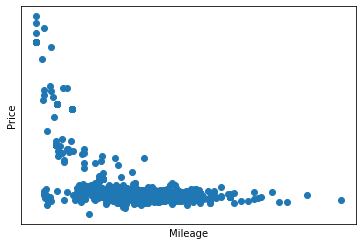

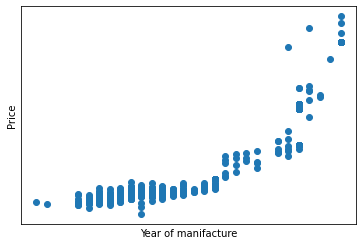

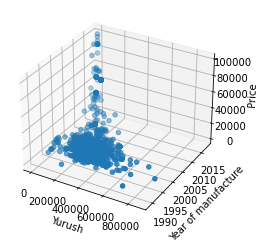

In [2]:
import matplotlib.pyplot as plt

y = df2['Qiymet']
x1 = df2['Yurush']

%matplotlib inline
plt.scatter(x1, y)
plt.xticks(ticks = [])
plt.yticks(ticks = [])
plt.ylabel("Price")
plt.xlabel("Mileage")
plt.show()


x2 = df2['Buraxilish ili']

%matplotlib inline
plt.scatter(x2, y)
plt.xticks(ticks = [])
plt.yticks(ticks = [])
plt.ylabel("Price")
plt.xlabel("Year of manifacture")
plt.show()

%matplotlib inline
ax = plt.axes(projection = "3d")
ax.set_xlabel("Yurush")
ax.set_ylabel("Year of manufacture")
ax.set_zlabel("Price")
ax.scatter3D(x1, x2, y)
plt.show()



# 3. Linear Regresa a mi

#### Implement Linear Regression from scratch (using numpy)
a) Calculate cost function. Implement a function which returns cost given true y values, x values and parameters (w).<br>
<div>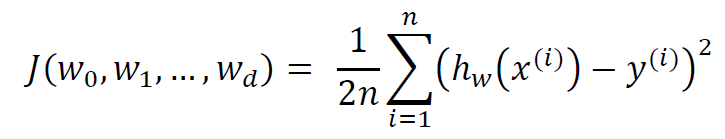</div>

In [3]:
print(df2)

import numpy as np

weights = np.array([0, 3, 1])
#weights = np.zeros((3,1))
#weights = np.random.uniform(size = (3,1))

def cost(dataset, w):
    x = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
      
    param1 = w[0]
    w = w[-2:]
    
    h = np.matmul(x, w) + param1
    
    j = (1/(2*h.size))*np.sum(((h - y)**2))
    return j

print(cost(df2, weights))

        Yurush  Buraxilish ili   Qiymet
0     366000.0          1999.0  12500.0
1     102000.0          2014.0  53550.0
2     469700.0          2002.0  11700.0
3     556680.0          1998.0   9700.0
4     300000.0          2000.0  12700.0
...        ...             ...      ...
1323  325000.0          1996.0   8800.0
1324  280000.0          1994.0   6300.0
1325  272000.0          1998.0  10900.0
1326  207000.0          2000.0  11300.0
1327  255700.0          1996.0  10500.0

[1328 rows x 3 columns]
409314332445.97253


b) Normalize data using Z score normalization (Recommended).<br>

In [4]:
mu_mileage = df2['Yurush'].mean()
std_mileage = df2['Yurush'].std()
zmileage = (df2['Yurush'] - mu_mileage) / std_mileage

mu_year = df2['Buraxilish ili'].mean()
std_year = df2['Buraxilish ili'].std()
zyear = (df2['Buraxilish ili'] - mu_year) / std_year

mu_price = df2['Qiymet'].mean()
std_price = df2['Qiymet'].std()
zprice = (df2['Qiymet'] - mu_price) / std_price

zdf = pd.concat([zmileage, zyear, zprice], axis = 1)

print(zdf.describe())

             Yurush  Buraxilish ili        Qiymet
count  1.328000e+03    1.328000e+03  1.328000e+03
mean  -5.500954e-17   -2.054899e-14 -2.437391e-16
std    1.000000e+00    1.000000e+00  1.000000e+00
min   -2.318445e+00   -2.038817e+00 -1.024617e+00
25%   -5.960882e-01   -5.377504e-01 -3.894719e-01
50%   -1.367872e-02   -1.624837e-01 -2.649336e-01
75%    6.329823e-01    2.514965e-02 -1.843500e-01
max    4.944056e+00    3.402550e+00  6.181755e+00


c) Implement gradient descent algorithm to minimize the cost function.
- Assign initial values of W=(w0, w1, w2) to zero or choose randomly
- Learning rate: alpha=0.001, you can change it in different experiments
- Number of iterations: 10000 or you can stop it when two sequential values are too close.
- Calculate values of parameters using gradient descent formula.
<div>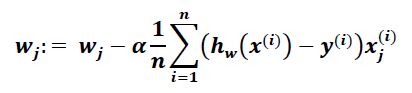</div>

In [5]:
alpha = 0.001
n = 10000

x0 = np.ones([1328])
x1 = zdf["Yurush"]
x2 = zdf["Buraxilish ili"]
x = np.array([x0, x1, x2])

y = zdf["Qiymet"]
y = np.array(y)

cost_evolution = []

for i in range(0, n):
    cost_evolution.append(cost(zdf, weights))
    h = np.matmul(x.T, weights)
    h = h.T
    loss = h - y
    gd = np.matmul(loss, x.T)
    weights = weights - alpha * (1/(y.size)) * gd

print(gd)
cost_evolution.append(cost(zdf, weights))
print(weights)


[4.58300065e-13 1.27189362e+01 1.27180146e+01]
[ 1.76213100e-14 -7.10349701e-02  8.53175801e-01]


d) Plot graph of Cost function and describe how it changes over iterations.

[    0     1     2 ...  9998  9999 10000] 10001 
 [4.60293834 4.59143653 4.57996857 ... 0.10635682 0.10635663 0.10635645] 10001


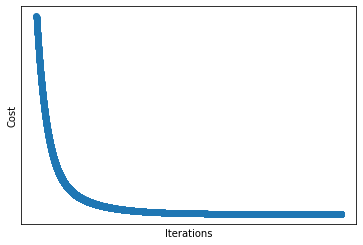

In [6]:
xplot = np.arange(start = 0, stop = n+1, step = 1)
yplot = np.array(cost_evolution)

print(xplot, xplot.size, "\n", yplot, yplot.size)

plt.scatter(xplot, yplot)
plt.xticks(ticks = [])
plt.yticks(ticks = [])
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.show()

e) Plot points of Y (Qiymet) vs X1 (Buraxilish ili) and draw a line of predictions made with parameters you got from gradient descent.

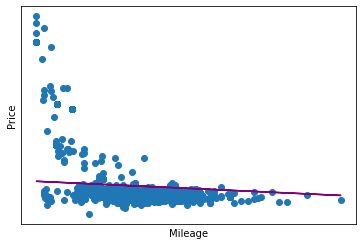

In [7]:
y = zdf['Qiymet']
x1 = zdf['Yurush']
x2 = zdf['Buraxilish ili']

%matplotlib inline
plt.scatter(x1, y)
plt.xticks(ticks = [])
plt.yticks(ticks = [])
plt.ylabel("Price")
plt.xlabel("Mileage")
prediction_line = weights[0] + x1*weights[1]
plt.plot(x1, prediction_line, color = 'purple')
plt.show()

f) Plot points of Y (Qiymet) vs X2 (Yurush) and draw a line of predictions made with parameters you got from gradient descent.

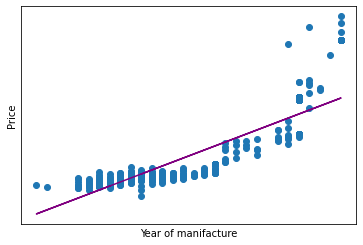

In [8]:
%matplotlib inline
plt.scatter(x2, y)
plt.xticks(ticks = [])
plt.yticks(ticks = [])
plt.ylabel("Price")
plt.xlabel("Year of manifacture")
prediction_line2 = weights[0] + x2*weights[2]
plt.plot(x2, prediction_line2, color = 'purple')
plt.show()

g) Plot 3D graph of points of Y (Qiymet), X1, X2 and predicted Y (Qiymet) using the same X1 and X2. It should look like this (blue points are true values, red points are predicted values):

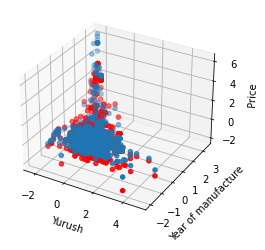

In [9]:
%matplotlib inline
ax = plt.axes(projection = "3d")
ax.set_xlabel("Yurush")
ax.set_ylabel("Year of manufacture")
ax.set_zlabel("Price")
ax.scatter3D(x1, x2, y)
prediction = weights[0] + x1*weights[1] + x2*weights[2]
ax.scatter(x1, x2, prediction, color = 'red')
plt.show()

h) Given are two new cars which are not in the dataset. Predict the prices of these cars by using your parameters and compare your predictions with the actual prices.
- Car 1 {Yurush: 240000, Buraxilish ili: 2000, Qiymet: 11500}
- Car 2 {Yurush: 415558, Buraxilish ili: 1996, Qiymet: 8800}

In [10]:
mileage1 = (240000-mu_mileage)/std_mileage
year1 = (2000-mu_year)/std_year

mileage2 = (415558-mu_mileage)/std_mileage
year2 = (1996-mu_year)/std_year


prediction1 = weights[0] + mileage1*weights[1] + year1*weights[2]
prediction2 = weights[0] + mileage2*weights[1] + year2*weights[2]

prediction1 = prediction1*std_price + mu_price
prediction2 = prediction2*std_price + mu_price

print("Price of Car 1: {}".format(prediction1))
print("Price of Car 2: {}".format(prediction2))

Price of Car 1: 15728.09700622451
Price of Car 2: 5575.924069341125


# 4. Linear Regression using library

#### Use a library to fit perform linear regression on the data. You should use the same features (Yurush and Buraxilish ili) as input to this model and perform the same testing (3(h)) as above (using scikit-learn library is recommended).

In [11]:
from sklearn.model_selection import train_test_split

x0 = np.ones([1328])
x1 = zdf["Yurush"]
x2 = zdf["Buraxilish ili"]
xd = {'x0': np.ones([1328]), 'Yurush': x1, 'Buraxilish ili': x2}
#x = pd.DataFrame(xd)

y = zdf["Qiymet"]
y = np.array(y)

SEED = 42

x_train, x_test, y_train, y_test = \
        train_test_split(x.T , y ,test_size = 0.2, random_state = SEED)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
 
print(reg.coef_)
#normalize ahead
#print mini-results and attributes

[ 0.         -0.08511026  0.82253734]
